In [36]:
import os
import json
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import urllib
import requests

**Load data from the web**

In [37]:
fname = "clubdata.json"
if not os.path.exists(fname):
    with requests.get("http://www.clubkataster.de/api/6/datasets/13/", stream=True, verify=False) as r:
        r.raise_for_status()
        with open(fname, 'wb') as w:
            for chunk in r.iter_content(chunk_size=65535):
                w.write(chunk)

/usr/local/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**Load file from disk**

In [39]:
with open('clubdata.json') as f:
    data = json.load(f)

**Import into Pandas**

In [40]:
df = pd.DataFrame(data = data["entries"])
df["eroeffnet"] = pd.to_datetime(df["eroeffnet"], errors="ignore")
df["geschlossen"] = pd.to_datetime(df["geschlossen"], errors="ignore")

**Ältester Club Berlins (?)**

In [41]:
df.iloc[df["eroeffnet"].idxmin()]

$fieldset                                                 viewer
betreiber      Berliner Lifestyle Marketing UG (haftungsbesch...
eroeffnet                                    1791-12-31 23:07:00
facebook       https://www.facebook.com/WartenbergerHofVerans...
geschlossen                                                  NaT
id                                                         12323
location                      {'lat': 52.57449, 'lng': 13.51296}
name                                            Wartenberger Hof
ort                                                       Berlin
plz                                                        13059
public                                                      True
slug                                            wartenberger-hof
status                                                     offen
str                                             Woldegker Str. 5
url                               http://www.wartenberger-hof.de
Name: 142, dtype: object

In [42]:
df

,$fieldset,betreiber,eroeffnet,facebook,geschlossen,id,location,name,ort,plz,public,slug,status,str,url
0,viewer,NaN,NaT,NaN,NaT,12183,"{'lat': 52.53468, 'lng': 13.20001}",Basement,Berlin,13597,True,basement,offen,Carl Schurz Str. 2-6,http://www.basement-spandau.de
1,viewer,Uwe Fabich (Investor),2014-12-31 23:00:00,https://www.facebook.com/funkhausberlin/,NaT,12184,"{'lat': 52.47951, 'lng': 13.50047}",Funkhaus Berlin,Berlin,12459,True,funkhaus-berlin,offen,Nalepastrasse 18,www.nalepastrasse.de
2,viewer,NaN,1998-12-31 23:00:00,https://www.facebook.com/Orion-Verwaltungs-Gmb...,NaT,12185,"{'lat': 52.4639499, 'lng': 13.49838}",Orion Verwaltungs GmbH,Berlin,10711,True,orion-verwaltungs-gmbh,offen,Storkwinkel 6,0
3,viewer,ORWOhaus e.V.,2003-12-31 23:00:00,https://www.facebook.com/orwohaus,NaT,12186,"{'lat': 52.53721, 'lng': 13.52969}",ORWOhaus,Berlin,12681,True,orwohaus,offen,Frank-Zappa-Str.19,www.orwohaus.de
4,viewer,NaN,NaT,NaN,NaT,12187,"{'lat': 52.45593, 'lng': 13.59709}",Abc,Berlin,12555,True,abc,geschlossen,Hirschgartenstr. 14,NaN
5,viewer,all eins e.V.,NaT,NaN,NaT,12188,"{'lat': 52.45131, 'lng': 13.58646}",All,Berlin,12555,True,all,offen,Friedrichshagener Str. 10,NaN
6,viewer,NaN,NaT,NaN,NaT,12189,"{'lat': 52.50955, 'lng': 13.49026}",Berliner Rockhaus,Berlin,10365,True,berliner-rockhaus,offen,Buchberger Str. 6,www.berlinerrockhaus.de
7,viewer,NaN,2008-12-31 23:00:00,https://www.facebook.com/themichelberger/,NaT,12190,"{'lat': 52.504643, 'lng': 13.447821}",Michelberger Hotel - Foyer,Berlin,10234,True,michelberger-hotel-foyer,offen,Warschauer Straße 39/40,http://michelbergermusic.com/
8,viewer,Alte Börse Marzahn GmbH,2013-12-31 23:00:00,https://www.facebook.com/alteboersemarzahn/?hc...,NaT,12191,None,Alte Börse Marzahn,Berlin,12681,True,alte-boerse-marzahn,offen,Zur Alten Börse 59,http://alte-boerse-marzahn.de/czar-hagestolz/
9,viewer,NaN,2001-12-31 23:00:00,NaN,NaT,12192,"{'lat': 52.537519, 'lng': 13.408971}",Cafe Morgenrot,Berlin,10435,True,cafe-morgenrot,offen,Kastanienallee 85,NaN


In [9]:
index = pd.date_range(date(1990,1,1), periods=29, freq='Y')

In [10]:
hstart  = pd.DataFrame(index=index, columns=["start","end","count"])
hclosed = pd.DataFrame(index=index, columns=["start","end","count"])

In [11]:
hstart.end = hstart.index
hclosed.end = hclosed.index

In [12]:
hstart["start"][0] = date(1990,1,1)
hclosed["start"][0] = date(1990,1,1)

/usr/local/Cellar/ipython/7.1.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.1.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
hstart["start"][1:] = index[:-1]
hclosed["start"][1:] = index[:-1]

/usr/local/Cellar/ipython/7.1.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.1.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
j=0
for index, row in hstart.iterrows():
    c = (df[(df['eroeffnet'] > row.start ) & (df['eroeffnet'] < row.end)]["id"].count() );
    hstart["count"][j] = c
    j=j+1;

/usr/local/Cellar/ipython/7.1.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
j=0
for index, row in hclosed.iterrows():
    c = (df[(df['geschlossen'] > row.start ) & (df['geschlossen'] < row.end)]["id"].count() );
    hclosed["count"][j] = c
    j=j+1;

/usr/local/Cellar/ipython/7.1.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Clubs founded**

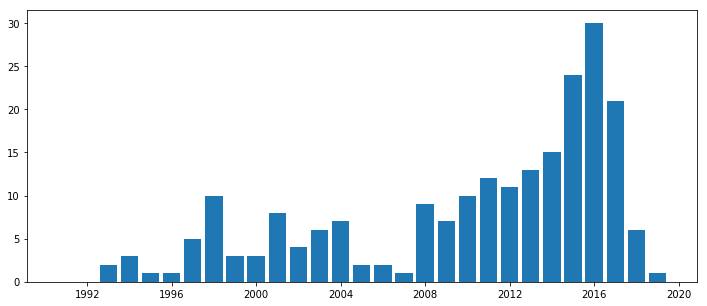

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(hstart.index,hclosed["count"], width = 300 );
#histogramm["count"].plot(kind = 'bar', color = 'blue');

** Clubs founded and closed down **

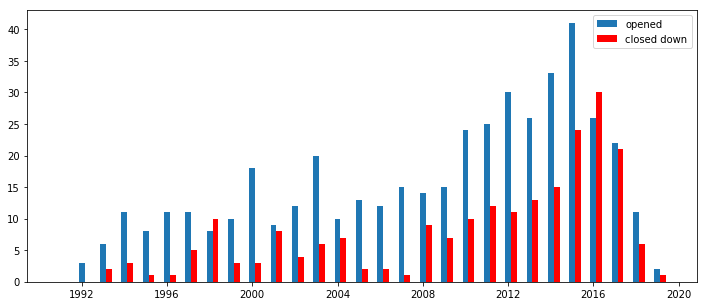

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
offset = timedelta(days = 100)
width = 100
ax.bar(hstart.index,
       hstart["count"], 
       width = width, 
       label = "opened");
ax.bar(hclosed.index + offset, 
       hclosed["count"],
       width = width,
       color = "red",
       label = "closed down");
ax.legend();

In [18]:
df[df["betreiber"].str.contains("GmbH", na=False)].id.count()

146

In [19]:
df[ df["betreiber"].str.contains("e.V.", na=False) | df["betreiber"].str.contains("e. V.", na=False) ].id.count()

39

In [20]:
df[ df["betreiber"].str.contains("e.K.", na=False) | df["betreiber"].str.contains("e. K.", na=False) ].id.count()

11

In [21]:
df[ df["betreiber"].str.contains("GbR", na=False) ].id.count()

40

In [22]:
df[ df["betreiber"].str.contains("UG", na=False) ].id.count()

17

In [23]:
df[ df["betreiber"].str.contains("xxxxxxxxxx", na=True) ].id.count()

710

**Who is the biggest Party animal?**

In [24]:
ClubsPerOwner = df["betreiber"].value_counts()

In [25]:
ClubsPerOwner[ClubsPerOwner>1]

cookies CHG GmbH, Unter den Linden 41, 10117 Berlin              7
Hedonismus Veranstaltungs GmbH, Schleusenufer 3, 10997 Berlin    3
Arena Berlin Betriebs GmbH                                       3
Privatperson                                                     3
Zur Wilden Renate OHG                                            3
Lido Kultur & Veranstaltungs GmbH                                2
Arena Berlin Betriebs GmbH Jana Seifert                          2
artevent GmbH                                                    2
Boiler Berlin Sauna GmbH, Mehringdamm 34, 10961 Berlin           2
Bogen 47 GmbH                                                    2
MUSIK & FRIEDEN KULTURBETRIEBE GMBH                              2
Admiralspalast Produktions GmbH                                  2
Alt Stralau 1 GmbH                                               2
M Productions GbR, Alt Stralau 27, 10245 Berlin                  2
Tacheles e.V.                                                 

It must be Cooky! Or maybe not?

In [45]:
df[df["status"]=="offen"] ["betreiber"].value_counts()

Privatperson                                                                                            3
Hedonismus Veranstaltungs GmbH, Schleusenufer 3, 10997 Berlin                                           3
Zur Wilden Renate OHG                                                                                   3
Arena Berlin Betriebs GmbH                                                                              3
Admiralspalast Produktions GmbH                                                                         2
Süsshain Veranstaltungs GmbH, Wühlischstr. 43, 10245 Berlin                                             2
Boiler Berlin Sauna GmbH, Mehringdamm 34, 10961 Berlin                                                  2
Bogen 47 GmbH                                                                                           2
artevent GmbH                                                                                           2
Lido Kultur & Veranstaltungs GmbH             

In [26]:
df[df["betreiber"]=="Hedonismus Veranstaltungs GmbH, Schleusenufer 3, 10997 Berlin"]

,$fieldset,betreiber,eroeffnet,facebook,geschlossen,id,location,name,ort,plz,public,slug,status,str,url
115,viewer,"Hedonismus Veranstaltungs GmbH, Schleusenufer ...",NaT,NaN,NaT,12297,"{'lat': 52.47581, 'lng': 13.42206}",Promenaden Eck,Berlin,12049,True,promenaden-eck,offen,Schillerpromenade 11,NaN
295,viewer,"Hedonismus Veranstaltungs GmbH, Schleusenufer ...",NaT,NaN,NaT,12479,"{'lat': 52.49768, 'lng': 13.44982}",Birgit & Bier,Berlin,12435,True,birgit-bier,offen,Schleusenufer 3,NaN
705,viewer,"Hedonismus Veranstaltungs GmbH, Schleusenufer ...",1996-12-31 23:00:00,https://www.facebook.com/minimal.elektrokneipe,NaT,12887,"{'lat': 52.51646, 'lng': 13.46404}",Minimal Bar,Berlin,10247,True,minimal-bar,offen,Rigaer Str. 31,http://www.minimal-berlin.de/


**Wikidata Link: http://tinyurl.com/y8e6h9vc**